In [358]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [328]:
weight = 0.1

def nn(input, weight) :
    prediction = input*weight
    return prediction

In [329]:
data = [8.5, 9.5, 10, 9]
input = data[0]
pred = nn(input, weight)
print(f'prediction : {pred:.4f}')

prediction : 0.8500


### With multiple input

<img src="./images/1.png" />

In [330]:
def dot(a,b) :
    assert(len(a) == len(b)) ,'input must same shape as weights'
    output = 0

    for i in range(len(a)) :
        output += (a[i] * b[i])

    return output 

In [331]:
weights = [0.1, 0.2, 0]

def nn(input, weights) :
    predictions = dot(input, weights)
    return predictions

In [332]:
# feature
f1 = [8.5, 9.5, 9.9, 9.0]
f2 = [0.65, 0.8, 0.8, 0.9]
f3 = [1.2, 1.3, 0.5, 1.0]

input = [f1[0], f2[0], f3[0]]

s1 = time.perf_counter()
prediction = nn(input, weights)
s2 = time.perf_counter()
print(f'take {((s2-s1)*10**3):.4f} ms')

print(f'prediction : {prediction:.4f}')

take 0.0333 ms
prediction : 0.9800


> faster and easier with numpy

In [333]:
weights = np.array(weights)

def nn(input, weights) :
    prediction = np.dot(input, weights) # just this 
    return prediction 

In [334]:
input = np.array([f1[0], f2[0], f3[0]])

s1 = time.perf_counter()
prediction = nn(input, weights)
s2 = time.perf_counter()
print(f'take {((s2-s1)*10**3):.4f} ms')

print(f'prediction : {prediction:.4f}')

take 0.4164 ms
prediction : 0.9800


> faster ? 

### Predicting with multiple inputs and outputs | with hidden layers

<img src="./images/2.png" />

In [341]:
hidden_l = np.random.randn(3,3)
output_l = np.random.randn(3,3)

layers = [hidden_l,output_l]

def nn(input, layers) :
    input = input.reshape(-1,1).T
    hidden = np.dot(input,layers[0])  # 1,3 dot 3,3 = 1,3
    relu = np.maximum(0, hidden)
    
    output = np.dot(relu, layers[1]) # 1,3 dot 3,3 = 1,3
    prediction = np.abs(output) # just want morethan 0
    
    return prediction

In [343]:
prediction = nn(input, layers)
print(f'predictions : {prediction[0]}')

predictions : [5.41940128 5.55846979 1.07106431]


## With Gradeint descent

In [385]:
weight = 0.5
input = 0.5
y_true = 0.8
lr = 0.001 # learning rate = a step to go per update

errors = []
preds = []
epoch = 1200

for iteration in range(epoch) :
    prediction = input * weight
    error = np.mean(np.square(y_true-prediction)) # just mse loss
    
    if (iteration+1) %100 == 0 :
        print(f'epoch : {iteration+1} Error = {error:.6f} / Prediction = {prediction:.6f}')

    errors.append(error)
    preds.append(prediction)
    
    # just try to up pred value
    up_prediction = input * (weight + lr)
    up_error = np.mean(np.square(y_true-up_prediction))

    # and try to down and see what is better
    down_prediction = input * (weight - lr)
    down_error = np.mean(np.square(y_true-down_prediction))

    # if down error is better -> then reduce weight 
    if down_error < up_error :
        weight -= lr
    else :
        weight += lr

epoch : 100 Error = 0.250500 / Prediction = 0.299500
epoch : 200 Error = 0.202950 / Prediction = 0.349500
epoch : 300 Error = 0.160400 / Prediction = 0.399500
epoch : 400 Error = 0.122850 / Prediction = 0.449500
epoch : 500 Error = 0.090300 / Prediction = 0.499500
epoch : 600 Error = 0.062750 / Prediction = 0.549500
epoch : 700 Error = 0.040200 / Prediction = 0.599500
epoch : 800 Error = 0.022650 / Prediction = 0.649500
epoch : 900 Error = 0.010100 / Prediction = 0.699500
epoch : 1000 Error = 0.002550 / Prediction = 0.749500
epoch : 1100 Error = 0.000000 / Prediction = 0.799500
epoch : 1200 Error = 0.000000 / Prediction = 0.800500


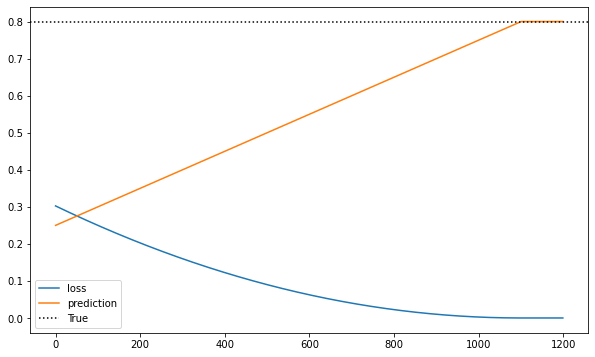

In [386]:
epochs = [_ for _ in range(epoch)]

plt.figure(figsize=(10,6))
plt.plot(epochs,errors, label='loss')
plt.plot(epochs, preds, label='prediction')
plt.axhline(0.8, linestyle='dotted',color='k',label='True')
plt.legend();

> but it inefficiency becuase you compute 2 way of loss(up and down) --> make it slower.

In [421]:
weight, y_true, input = (0.0, 0.8, 0.5)

epoch = 25
errors = []
preds = []
for iteration in range(epoch) :
    pred = input * weight
    error = np.mean(np.square(y_true - pred)) # loss

    delta = pred - y_true # how pred far from y_true
    weight -= (delta * input)

    errors.append(error)
    preds.append(pred)

    if (iteration+1)%3 == 0 or (iteration+1) == epoch:
        print(f'epoch : {iteration+1} Error = {error:.6f} / Prediction = {pred:.6f}')

epoch : 3 Error = 0.202500 / Prediction = 0.350000
epoch : 6 Error = 0.036041 / Prediction = 0.610156
epoch : 9 Error = 0.006414 / Prediction = 0.719910
epoch : 12 Error = 0.001142 / Prediction = 0.766212
epoch : 15 Error = 0.000203 / Prediction = 0.785746
epoch : 18 Error = 0.000036 / Prediction = 0.793986
epoch : 21 Error = 0.000006 / Prediction = 0.797463
epoch : 24 Error = 0.000001 / Prediction = 0.798930
epoch : 25 Error = 0.000001 / Prediction = 0.799197


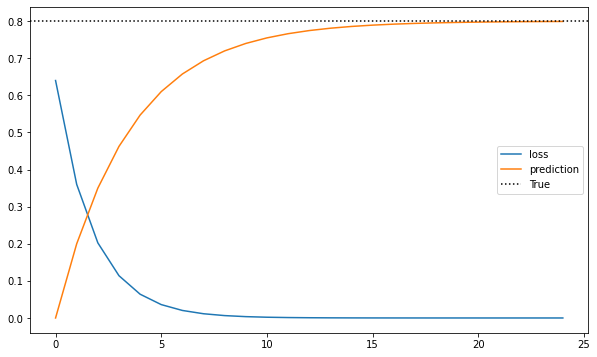

In [422]:
epochs = [_ for _ in range(epoch)]

plt.figure(figsize=(10,6))
plt.plot(epochs,errors, label='loss')
plt.plot(epochs, preds, label='prediction')
plt.axhline(0.8, linestyle='dotted',color='k',label='True')
plt.legend();

> very efficeint